# **CLASE 4 (Tercera parte)**

Librerías:
- Seaborn

## **Seaborn:**




Proporciona un contenedor sobre matplotlib para facilitar su uso con tipos de gráficos comunes. Es decir, nos permite hacer gráficos más complejos sin la necesidad de utilizar tanto código.

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
#define la estética global de todos tus gráficos de una sola vez.

sns.set_theme(style="dark")

###**Ejercicio:**

Veamos un conjunto de datos de sobre propinas en restaurantes. Queremos crear un gráfico de barras apiladas que muestre el porcentaje de puntos de datos para cada tamaño de grupo cada día.

**Nota:**

Se deben cargar los datos y hacer una tabulación cruzada por día y tamaño del grupo. La función *pandas.crosstab* es una forma práctica de calcular una tabla de frecuencias simple a partir de dos columnas de un DataFrame.

In [ ]:
# Carga un dataset de ejemplo que viene con Seaborn sobre propinas (tips) en un restaurante
#tips = sns.load_dataset("tips")

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
#Toma la columna que le indiques y cuenta cuántas veces aparece cada categoría en los datos.
tips.value_counts("day")

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
tips.value_counts("time")

,count
time,
Dinner,176
Lunch,68


In [ ]:
tips.value_counts("size")

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


In [ ]:
#Puede dar la información en proporciones respecto al total
tips.value_counts("day", normalize=True)

,proportion
day,
Sat,0.356557
Sun,0.311475
Thur,0.254098
Fri,0.077869


**Usando pandas.crosstab**

In [ ]:

#Crea una tabla que cuenta cuántas mesas de cada tamaño de personas (1, 2, 3...) hubo por cada día
totales = pd.crosstab(tips["day"], tips["size"])

# Reordena las filas para que los días aparezcan en orden lógico (Jueves a Domingo) en vez de alfabético
totales = totales.reindex(index=["Thur", "Fri", "Sat", "Sun"])

# El resultado es una tabla de frecuencias cruzadas:
# - Las filas son los días
# - Las columnas son el número de personas en el grupo (2, 3, 4...)
# - El resultado es cuántas veces ocurrió esa combinación.
totales

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [ ]:
#Se pueden seleccionar de nuestro dataframe original, nuestros datos de interés y hacer una nueva

# Filtra la tabla. Selecciona TODAS las filas (:) y solo las columnas del 2 al 5 (2:5)
totales = totales.loc[:, 2:5]

totales

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [ ]:
# Podemos  realizar proporciones

#En este caso, sacamos las proporciones del total "por cada día" (por fila)
totales_prop = (totales.div(totales.sum(axis="columns"), axis="index") *100).round(2)
totales_prop

#Por ejemplo, si interpretamos el resultado de la primera columna en jueves, significa que
#el 82.8% de todas las mesas que se atendieron el jueves eran grupos de exactamente 2 personas.

size,2,3,4,5
day,,,,
Thur,82.76,6.90,8.62,1.72
Fri,88.89,5.56,5.56,0.00
Sat,62.35,21.18,15.29,1.18
Sun,52.00,20.00,24.00,4.00


<Axes: xlabel='day'>

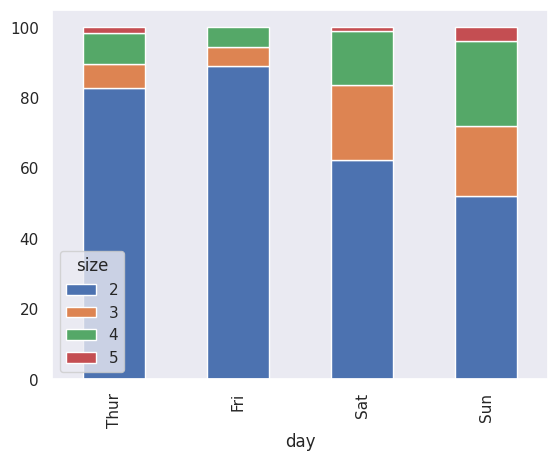

In [ ]:
totales_prop.plot.bar(stacked=True)

In [ ]:
#En este caso realizamos otra proporción.

#crear una nueva columna en tu tabla llamada "propinas_porcentaje", calculando qué proporción representa la propina respecto al costo de la comida.
tips["propinas_porcentaje"] = ((tips["tip"] / (tips["total_bill"] - tips["tip"])) * 100).round(2) #(Propina/ Cuenta Total - Propina)
tips

,total_bill,tip,sex,smoker,day,time,size,propinas_porcentaje
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,25.62
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.94
241,22.67,2.00,Male,Yes,Sat,Dinner,2,9.68
242,17.82,1.75,Male,No,Sat,Dinner,2,10.89


In [ ]:
#La siguiente función, genera un resumen estadístico de las columnas numéricas.
tips.describe().round(2)

,total_bill,tip,size,propinas_porcentaje
count,244.00,244.00,244.00,244.00
mean,19.79,3.00,2.57,20.21
std,8.90,1.38,0.95,16.34
min,3.07,1.00,1.00,3.70
25%,13.35,2.00,2.00,14.83
50%,17.80,2.90,2.00,18.31
75%,24.13,3.56,3.00,23.68
max,50.81,10.00,6.00,245.24


### **Gráficos:**

 Las funciones gráficas en seaborn toman un argumento de datos, que puede ser un DataFrame de pandas. Los demás argumentos se refieren a los nombres de las columnas.

Para el siguiente ejemplo *(gráfica de barras)*, dado que hay múltiples observaciones para cada valor del día, las barras representan el valor promedio de propina_porcentaje. Las líneas negras dibujadas en las barras representan el intervalo de confianza del 95 % (esto se puede configurar mediante argumentos opcionales).

<Axes: xlabel='propinas_porcentaje', ylabel='day'>

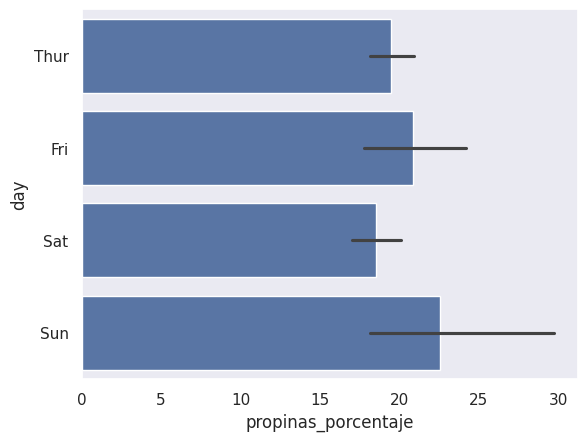

In [ ]:
#Creamos un gráfico de barras
sns.barplot(x="propinas_porcentaje", y="day", data=tips, orient="h")

También, *seaborn.barplot* tiene una opción de tono *(hue)* que nos permite dividir por un valor categórico adicional.

In [ ]:
# Cuenta cuántas veces aparece cada categoría en la columna 'time' (Dinner vs Lunch)
tips.value_counts("time")

,count
time,
Dinner,176
Lunch,68


<Axes: xlabel='propinas_porcentaje', ylabel='day'>

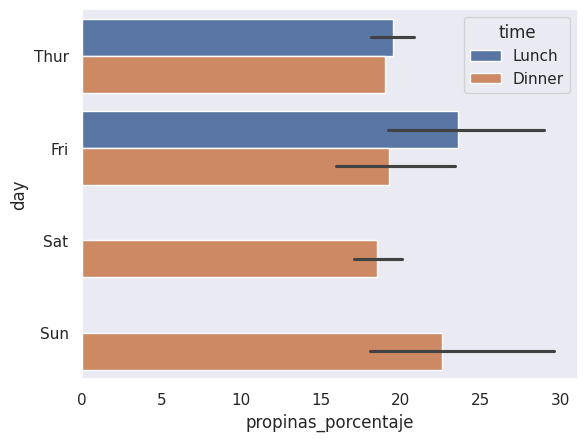

In [ ]:
sns.barplot(x="propinas_porcentaje", y="day", hue="time", data=tips, orient="h")

## **Estética de gráficos:**

Es posible cambiar entre diferentes apariencias de gráfico usando *seaborn.set_style*.


<Axes: xlabel='propinas_porcentaje', ylabel='day'>

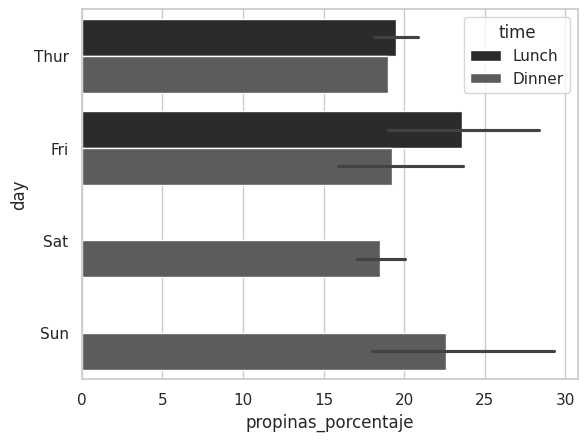

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")
sns.barplot(x="propinas_porcentaje", y="day", hue="time", data=tips, orient="h")

## **Otros estilos de gráficos**

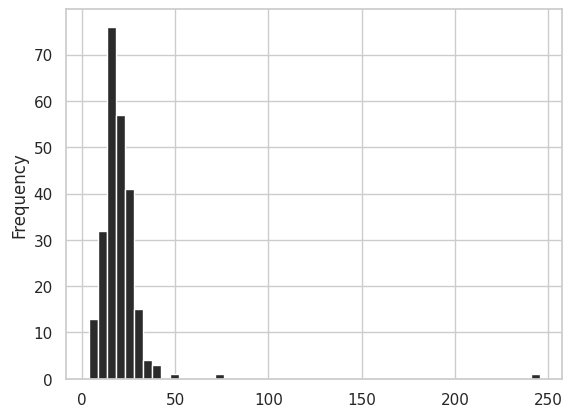

In [ ]:
#Histograma
tips["propinas_porcentaje"].plot.hist(bins=50);

<Axes: xlabel='day', ylabel='total_bill'>

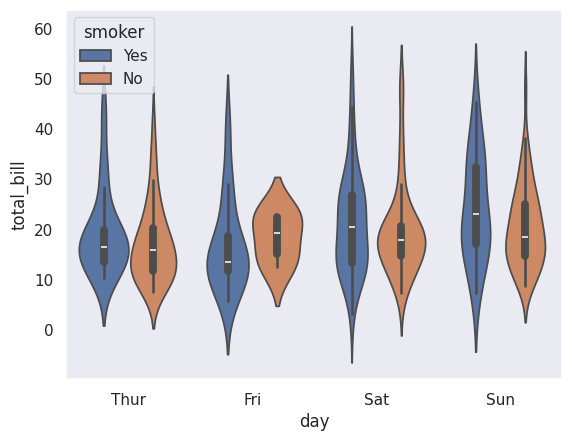

In [ ]:
#Gráfico de violín
sns.set_theme(style="dark")
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker")

<Axes: xlabel='day', ylabel='total_bill'>

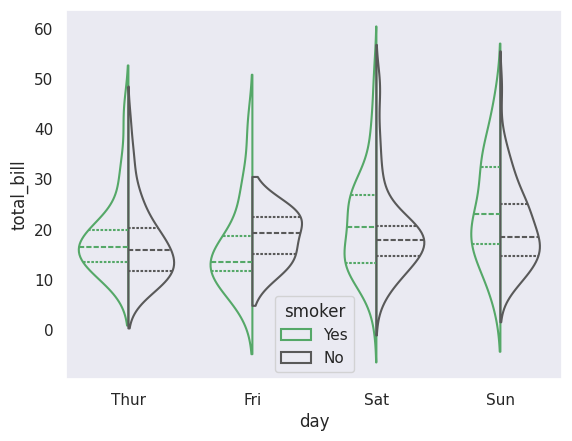

In [ ]:
# Carga un dataset de ejemplo que viene con Seaborn sobre propinas (tips) en un restaurante
tips = sns.load_dataset("tips")

# Crea el gráfico de violín con los siguientes parámetros:
sns.violinplot(
    data = tips,               # Indica la fuente de los datos (el DataFrame 'tips')
    x = "day",                 # Eje X: agrupa los datos por día de la semana (Jue, Vie, Sab, Dom)
    y = "total_bill",          # Eje Y: muestra la distribución de la cuenta total pagada
    hue = "smoker",            # Separa los datos en dos grupos: fumadores y no fumadores
    split = True,              # En lugar de dos violines separados, pega las dos mitades en uno solo
    inner = "quart",           # Dibuja líneas internas que representan los cuartiles (mediana y extremos)
    fill = False,              # Evita que el fondo del violín tenga un color sólido (lo deja transparente)
    palette = {"Yes": "g", "No": ".35"} # Asigna colores específicos: verde (g) para fumadores y gris oscuro (.35) para no fumadores
)